# Analysis: Crystallization of ice Ih

This Jupyter Notebook contains the analysis to reproduce the results and figures reported in the paper.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Free energy surfaces

We will plot the FES as a function of temperature for $N=96$ molecules

In [2]:
data270=np.genfromtxt("96molecules/270K/fes.b1.iter-60000.data")
data280=np.genfromtxt("96molecules/280K/fes.b1.iter-40000.data")
data290=np.genfromtxt("96molecules/290K/fes.b1.iter-40000.data")
data300=np.genfromtxt("96molecules/300K/fes.b1.iter-40000.data")

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


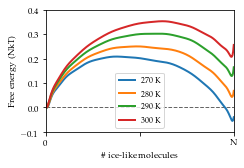

In [3]:

###################################################################
# Plot options
###################################################################
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.37,2.25)


prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

plt.plot([0,96],[0,0],'--',color='black',alpha=0.6,linewidth=1)

num_molecules=96

temp=270
NkT=0.0083144621*temp*num_molecules
size=data270.shape[0]
plt.plot(data270[:,0],(data270[:,1]-np.amin(data270[:int(size/2),1]))/NkT,linewidth=2,color=colors[0],label="270 K")

temp=280
NkT=0.0083144621*temp*num_molecules
plt.plot(data280[:,0],data280[:,1]/NkT,linewidth=2,color=colors[1],label="280 K")

temp=290
NkT=0.0083144621*temp*num_molecules
plt.plot(data290[:,0],data290[:,1]/NkT,linewidth=2,color=colors[2],label="290 K")

temp=300
NkT=0.0083144621*temp*num_molecules
plt.plot(data300[:,0],data300[:,1]/NkT,linewidth=2,color=colors[3],label="300 K")
plt.xlabel("\# ice-like molecules")
plt.ylabel("Free energy (NkT)")
plt.xlim([0,96])
plt.ylim([-0.1,0.4])
plt.xticks([0,48,96],["0","","N"])
plt.yticks([-0.1,0.0,0.1,0.2,0.3,0.4])

#plt.text(85,0.34,"300 K", fontsize=8, horizontalalignment='center', verticalalignment='center',color=colors[3])
#plt.text(68,0.31,"290 K", fontsize=8, horizontalalignment='center', verticalalignment='center',color=colors[2])
plt.legend(fontsize=8)

#plt.savefig("Figure2.png", dpi=300, bbox_inches='tight')

plt.show()

# Variational coefficients

We show the evolution of the variational coefficients for the simulation at 300 K with $N=96$ molecules

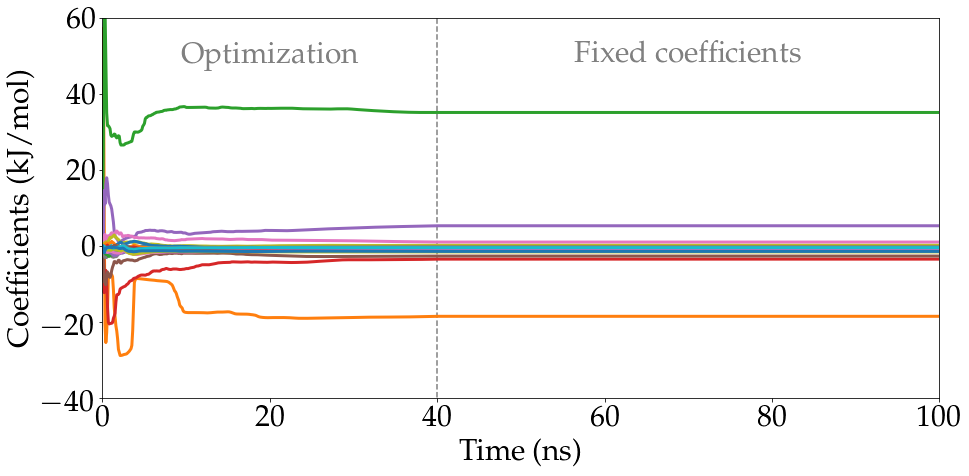

In [4]:
###################################################################
# Plot options
###################################################################
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 30}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (15,7)

data=np.genfromtxt("96molecules/300K/coeffs.data")
numCoeffs=21
numEntries=int(data.shape[0]/numCoeffs)

plt.plot([40,40],[-200,200],'--',color='gray')
x=np.linspace(0,numEntries,numEntries)/10
y=data[:,1].reshape(numEntries,numCoeffs)
for i in range(60):
    x=np.append(x,x[-1]+1)
    y=np.append(y,y[-2:-1,:],axis=0)
    
plt.plot(x,y,linewidth=3)

plt.xlim([0,100])
plt.ylim([-40,60])

plt.text(20,50,"Optimization",horizontalalignment='center', verticalalignment='center',color='gray')
plt.text(70,50,"Fixed coefficients",horizontalalignment='center', verticalalignment='center',color='gray')

plt.xlabel("Time (ns)")
plt.ylabel("Coefficients (kJ/mol)")

plt.show()

# Dynamics of the liquid-ice Ih transformation

We analyze the trajectories and correlation times as a function of temperature.

In [5]:
COLVAR270=np.genfromtxt("96molecules/270K/Reweight/COLVARnotrim")
COLVAR280=np.genfromtxt("96molecules/280K/Reweight/COLVARnotrim")
COLVAR290=np.genfromtxt("96molecules/290K/Reweight/COLVARnotrim")
COLVAR300=np.genfromtxt("96molecules/300K/Reweight/COLVARnotrim")

In [6]:
def autocorr(x):
    """Calculate autocorrelation function.

    Args:
        x (numpy array): An array with the time sequence

    Returns:
        numpy array: the autocorrelation function

    """
    result = np.correlate(x-np.mean(x), x-np.mean(x), mode='full')
    return result[int(result.shape[0]/2):]

In [7]:
corr270=autocorr(COLVAR270[:,3])

In [8]:
corr280=autocorr(COLVAR280[:,3])

In [9]:
corr290=autocorr(COLVAR290[:,3])

In [10]:
corr300=autocorr(COLVAR300[:,3])

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


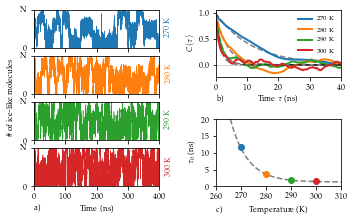

In [14]:
###################################################################
# Plot options
###################################################################
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 8}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (5.5,3.25)

temps=np.array([270,280,290,300])

def func(x, b):
    return np.exp(-x/b)

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
#print(colors)

fig = plt.figure()

ax1 = plt.subplot2grid((4, 2), (0, 0))
x=np.linspace(0,COLVAR270[:,3].shape[0],COLVAR270[:,3].shape[0])/1000
ax1.plot(x,COLVAR270[:,3],color=colors[0],linewidth=0.5)
ax1.set_xlim([0,400])
ax1.set_xticklabels([])
ax1.text(430,50,"270 K",color=colors[0],rotation=90, ha='center', va='center')
ax1.set_ylim([0,96])
ax1.set_yticks([0,96])
ax1.set_yticklabels(['0','N'])

ax2 = plt.subplot2grid((4, 2), (1, 0))
x=np.linspace(0,COLVAR280[:,3].shape[0],COLVAR280[:,3].shape[0])/1000
ax2.plot(x,COLVAR280[:,3],color=colors[1],linewidth=0.5)
ax2.set_xlim([0,400])
ax2.set_xticklabels([])
ax2.text(430,50,"280 K",color=colors[1],rotation=90, ha='center', va='center')
ax2.set_ylim([0,96])
ax2.set_yticks([0,96])
ax2.set_yticklabels(['0','N'])

ax3 = plt.subplot2grid((4, 2), (2, 0))
x=np.linspace(0,COLVAR290[:,3].shape[0],COLVAR290[:,3].shape[0])/1000
ax3.plot(x,COLVAR290[:,3],color=colors[2],linewidth=0.5)
ax3.set_xlim([0,400])
ax3.set_ylabel(r'\# of ice-like molecules')
#ax3.set_ylabel(r'$n_{ice}$')
ax3.yaxis.set_label_coords(-0.15, 1.1)
ax3.set_xticklabels([])
ax3.text(430,50,"290 K",color=colors[2],rotation=90, ha='center', va='center')
ax3.set_ylim([0,96])
ax3.set_yticks([0,96])
ax3.set_yticklabels(['0','N'])

ax4 = plt.subplot2grid((4, 2), (3, 0))
x=np.linspace(0,COLVAR300[:,3].shape[0],COLVAR300[:,3].shape[0])/1000
ax4.plot(x,COLVAR300[:,3],color=colors[3],linewidth=0.5)
ax4.set_xlim([0,400])
ax4.set_xlabel("Time (ns)")
ax4.text(430,50,"300 K",color=colors[3],rotation=90, ha='center', va='center')
ax4.set_ylim([0,96])
ax4.set_yticks([0,96])
ax4.set_yticklabels(['0','N'])
ax4.text(0,-60,"a)")

ax5 = plt.subplot2grid((5, 2), (0, 1),rowspan=2)

# Fit decaying exponential to autocorrelation functions

def func(x, b):
    return np.exp(-x/b)

param=np.zeros([4])

xdata=np.linspace(0,corr270.shape[0],corr270.shape[0])/1000
ydata=corr270/np.amax(corr270)
popt, pcov = curve_fit(func, xdata, ydata)
param[0]=popt[0]

xdata=np.linspace(0,corr280.shape[0],corr280.shape[0])/1000
ydata=corr280/np.amax(corr280)
popt, pcov = curve_fit(func, xdata, ydata)
param[1]=popt[0]

xdata=np.linspace(0,corr290.shape[0],corr290.shape[0])/1000
ydata=corr290/np.amax(corr290)
popt, pcov = curve_fit(func, xdata, ydata)
param[2]=popt[0]

xdata=np.linspace(0,corr300.shape[0],corr300.shape[0])/1000
ydata=corr300/np.amax(corr300)
popt, pcov = curve_fit(func, xdata, ydata)
param[3]=popt[0]


ax5.plot([0,40],[0,0],'k--',alpha=0.5,linewidth=0.5)
xdata=np.linspace(0,corr270.shape[0],corr270.shape[0])/1000
ax5.plot(xdata, func(xdata, param[0]),'k--',alpha=0.5)
ax5.plot(xdata,corr270/np.amax(corr270),linewidth=2.0,label="270 K")

xdata=np.linspace(0,corr280.shape[0],corr280.shape[0])/1000
ax5.plot(xdata, func(xdata, param[1]),'k--',alpha=0.5)
ax5.plot(xdata,corr280/np.amax(corr280),linewidth=2.0,label="280 K")
        
xdata=np.linspace(0,corr290.shape[0],corr290.shape[0])/1000
ax5.plot(xdata, func(xdata, param[2]),'k--',alpha=0.5)
ax5.plot(xdata,corr290/np.amax(corr290),linewidth=2.0,label="290 K")
         
xdata=np.linspace(0,corr300.shape[0],corr300.shape[0])/1000
ax5.plot(xdata, func(xdata, param[3]),'k--',alpha=0.5)
ax5.plot(xdata,corr300/np.amax(corr300),linewidth=2.0,label="300 K")
ax5.set_xlim([0,40])
ax5.legend(fontsize=7,loc='upper right',frameon=False)
ax5.set_xlabel(r"Time $\tau$ (ns)")
ax5.set_ylabel(r"$C(\tau)$")
ax5.text(0,-0.7,"b)")

ax6 = plt.subplot2grid((5, 2), (3, 1),rowspan=2)

# Fit tau to exponential

def func2(x, a, b , c):
    return c + np.exp(-(x-a)/b)

param2=np.array([11.61843143,  3.65036674,  1.99837813,  1.47805115, 1.25])
temps2=np.array([270,280,290,300,500])

xdata=temps2
ydata=param2
popt, pcov = curve_fit(func2, xdata, ydata,p0=[300,1,10])
newxdata=np.linspace(260,310,1000)
ax6.plot(newxdata,func2(newxdata,*popt),'k--',alpha=0.5,zorder=1)
ax6.set_xlabel("Temperature (K)")
ax6.set_ylabel(r"$\tau_0$ (ns)")


ax6.scatter(temps[0],param[0],color=colors[0],zorder=2)
ax6.scatter(temps[1],param[1],color=colors[1],zorder=2)
ax6.scatter(temps[2],param[2],color=colors[2],zorder=2)
ax6.scatter(temps[3],param[3],color=colors[3],zorder=2)

ax6.set_ylim([0,20])
ax6.set_xlim([260,310])
ax6.text(260,-7.5,"c)")

plt.subplots_adjust(wspace=0.45)

#plt.savefig("Figure3.png", dpi=300, bbox_inches='tight')

plt.show()

# Calculation of free energies from reweighting

We calculate the free energies as a function of temperature and system suze using reweighting.

In [15]:
def freeEnergy(CV,bias,temperature,CVlimit):
    """Calculate the free energy difference between to phases.

    Args:
        CV (numpy array): An array with the collective variable values
        bias (numpy array): An array with the bias values in kJ/mol
        temperature (float): The temperature in K
        CVlimit (float): Watershed between the two phases (CVunits)

    Returns:
        float: the free energy in kJ/mol
    """
    beta=1./(0.00831441001626*temperature) # 1/(kJ/mol)
    probLiquid=np.sum(np.exp(beta*bias[CV<=CVlimit]))
    probSolid=np.sum(np.exp(beta*bias[CV>=CVlimit]))
    freeEnergy=-(1./beta)*np.log(probSolid/probLiquid)
    return freeEnergy

### 96 molecules

In [16]:
temps=np.array([270,280,290,300])
betas=1./(0.00831441001626*temps)

In [17]:
N=96

In [18]:
COLVARtrim270=np.genfromtxt("96molecules/270K/Reweight/COLVARtrim")
COLVARtrim280=np.genfromtxt("96molecules/280K/Reweight/COLVARtrim")
COLVARtrim290=np.genfromtxt("96molecules/290K/Reweight/COLVARtrim")
COLVARtrim300=np.genfromtxt("96molecules/300K/Reweight/COLVARtrim")

In [19]:
CV270=np.copy(COLVARtrim270[:,3])
Bias270=np.copy(COLVARtrim270[:,4])+np.copy(COLVARtrim270[:,9])
CV280=np.copy(COLVARtrim280[:,3])
Bias280=np.copy(COLVARtrim280[:,4])+np.copy(COLVARtrim280[:,9])
CV290=np.copy(COLVARtrim290[:,3])
Bias290=np.copy(COLVARtrim290[:,4])+np.copy(COLVARtrim290[:,9])
CV300=np.copy(COLVARtrim300[:,3])
Bias300=np.copy(COLVARtrim300[:,4])+np.copy(COLVARtrim300[:,9])

In [20]:
freeEnergy270=freeEnergy(CV270,Bias270,270,N/2.0)/float(N)
freeEnergy280=freeEnergy(CV280,Bias280,280,N/2.0)/float(N)
freeEnergy290=freeEnergy(CV290,Bias290,290,N/2.0)/float(N)
freeEnergy300=freeEnergy(CV300,Bias300,300,N/2.0)/float(N)
freeEnergies96=np.array([freeEnergy270,freeEnergy280,freeEnergy290,freeEnergy300])

In [21]:
print(betas[0]*freeEnergy270,betas[1]*freeEnergy280,betas[2]*freeEnergy290,betas[3]*freeEnergy300)

-0.053427599710075595 0.03710306250262482 0.12251555975715782 0.19958712224513642


### 288 molecules

In [22]:
N=288

In [23]:
COLVARtrim280=np.genfromtxt("288molecules/280K/Reweight/COLVARtrim")
COLVARtrim290=np.genfromtxt("288molecules/290K/Reweight/COLVARtrim")
COLVARtrim300=np.genfromtxt("288molecules/300K/Reweight/COLVARtrim")

In [24]:
CV280=np.copy(COLVARtrim280[:,3])
Bias280=np.copy(COLVARtrim280[:,4])+np.copy(COLVARtrim280[:,9])
CV290=np.copy(COLVARtrim290[:,3])
Bias290=np.copy(COLVARtrim290[:,4])+np.copy(COLVARtrim290[:,9])
CV300=np.copy(COLVARtrim300[:,3])
Bias300=np.copy(COLVARtrim300[:,4])+np.copy(COLVARtrim300[:,9])

In [25]:
freeEnergy280=freeEnergy(CV280,Bias280,280,N/2.0)/float(N)
freeEnergy290=freeEnergy(CV290,Bias290,290,N/2.0)/float(N)
freeEnergy300=freeEnergy(CV300,Bias300,300,N/2.0)/float(N)
freeEnergies288=np.array([freeEnergy280,freeEnergy290,freeEnergy300])

In [26]:
print(betas[1]*freeEnergy280,betas[2]*freeEnergy290,betas[3]*freeEnergy300)

0.06778186488501818 0.15477502017104305 0.23699936937293598


### 16 molecules

In [27]:
N=16

In [28]:
COLVARtrim270=np.genfromtxt("16molecules/270K/Reweight/COLVARtrim")
COLVARtrim280=np.genfromtxt("16molecules/280K/Reweight/COLVARtrim")
COLVARtrim290=np.genfromtxt("16molecules/290K/Reweight/COLVARtrim")
COLVARtrim300=np.genfromtxt("16molecules/300K/Reweight/COLVARtrim")

In [29]:
CV270=np.copy(COLVARtrim270[:,3])
Bias270=np.copy(COLVARtrim270[:,4])+np.copy(COLVARtrim270[:,8])
Q6270=np.copy(COLVARtrim270[:,6])

CV280=np.copy(COLVARtrim280[:,3])
Bias280=np.copy(COLVARtrim280[:,4])+np.copy(COLVARtrim280[:,8])
Q6280=np.copy(COLVARtrim280[:,6])

CV290=np.copy(COLVARtrim290[:,3])
Bias290=np.copy(COLVARtrim290[:,4])+np.copy(COLVARtrim290[:,8])
Q6290=np.copy(COLVARtrim290[:,6])

CV300=np.copy(COLVARtrim300[:,3])
Bias300=np.copy(COLVARtrim300[:,4])+np.copy(COLVARtrim300[:,8])
Q6300=np.copy(COLVARtrim300[:,6])

In [30]:
freeEnergy270=freeEnergy(CV270,Bias270,270,N/2.0)/float(N)
freeEnergy280=freeEnergy(CV280,Bias280,280,N/2.0)/float(N)
freeEnergy290=freeEnergy(CV290,Bias290,290,N/2.0)/float(N)
freeEnergy300=freeEnergy(CV300,Bias300,300,N/2.0)/float(N)
freeEnergies16=np.array([freeEnergy270,freeEnergy280,freeEnergy290,freeEnergy300])

In [31]:
print(betas[0]*freeEnergy270,betas[1]*freeEnergy280,betas[2]*freeEnergy290,betas[3]*freeEnergy300)

-0.2903250102124656 -0.2015451558902462 -0.15076179623370797 -0.09300665696343058


In [32]:
particles=np.array([16,96,288])
freeEnergies270K=np.array([freeEnergies16[0],freeEnergies96[0]])
freeEnergies280K=np.array([freeEnergies16[1],freeEnergies96[1],freeEnergies288[0]])
freeEnergies290K=np.array([freeEnergies16[2],freeEnergies96[2],freeEnergies288[1]])
freeEnergies300K=np.array([freeEnergies16[3],freeEnergies96[3],freeEnergies288[2]])

Extrapolated free energies (kT) and errors (kT)
[-0.00604812  0.08438591  0.17605158  0.25768737] [0.00848528 0.00702049 0.00538439 0.00528524]
Melting temperature (K) and error (K)
270.35891580361925 1.9209948534368522


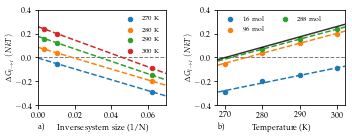

In [33]:
###################################################################
# Plot options
###################################################################
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 8}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (5.5,1.75)


from scipy.optimize import curve_fit

def func(x, a, b):
    return a*x+b

scattersize=20

ax1 = plt.subplot2grid((1, 2), (0, 0))

ax1.plot([0,0.1],[0,0],'k--',alpha=0.5,linewidth=1)

intercepts=np.zeros(4)
interceptsError=np.zeros(4)
temperature=270
beta=1./(0.00831441001626*temperature)
ax1.scatter(1./np.array([16,96]),beta*freeEnergies270K, label="270 K",s=scattersize)
popt, pcov = curve_fit(func, 1./np.array([16,96]), beta*freeEnergies270K,sigma=np.array([0.03,0.005]),absolute_sigma=True)
xdata=np.linspace(0.,1./10.,10)
ax1.plot(xdata,func(xdata,*popt),'--')
intercepts[0]=popt[1]
interceptsError[0]=np.sqrt(np.diag(pcov))[1]

temperature=280
beta=1./(0.00831441001626*temperature)
ax1.scatter(1./particles,beta*freeEnergies280K, label="280 K",s=scattersize)
popt, pcov = curve_fit(func, 1./particles, beta*freeEnergies280K, sigma=np.array([0.03,0.005,0.01]),absolute_sigma=True)
ax1.plot(xdata,func(xdata,*popt),'--')
intercepts[1]=popt[1]
interceptsError[1]=np.sqrt(np.diag(pcov))[1]

temperature=290
beta=1./(0.00831441001626*temperature)
ax1.scatter(1./particles,beta*freeEnergies290K, label="290 K",s=scattersize)
popt, pcov = curve_fit(func, 1./particles, beta*freeEnergies290K, sigma=np.array([0.008,0.005,0.01]),absolute_sigma=True)
ax1.plot(xdata,func(xdata,*popt),'--')
intercepts[2]=popt[1]
interceptsError[2]=np.sqrt(np.diag(pcov))[1]

temperature=300
beta=1./(0.00831441001626*temperature)
ax1.scatter(1./particles,beta*freeEnergies300K, label="300 K",s=scattersize)
popt, pcov = curve_fit(func, 1./particles, beta*freeEnergies300K, sigma=np.array([0.005,0.005,0.01]),absolute_sigma=True)
ax1.plot(xdata,func(xdata,*popt),'--')
intercepts[3]=popt[1]
interceptsError[3]=np.sqrt(np.diag(pcov))[1]

print("Extrapolated free energies (kT) and errors (kT)")
print(intercepts,interceptsError)

ax1.set_xlabel("Inverse system size (1/N)")
ax1.set_ylabel(r"$\Delta G_{l\rightarrow i} \:\:(NkT)$",labelpad=-1)
ax1.legend(fontsize=7,loc='upper right',frameon=False)
ax1.set_xlim([0,0.07])
ax1.set_ylim([-0.4,0.4])
ax1.text(0.,-0.6,"a)")

ax2 = plt.subplot2grid((1, 2), (0, 1))

ax2.plot([260,310],[0,0],'k--',alpha=0.5,linewidth=1)

ax2.scatter(temps,betas*freeEnergies16,label="16 mol",s=scattersize)
popt, pcov = curve_fit(func, temps, betas*freeEnergies16)
xdata=np.linspace(260,310,10)
ax2.plot(xdata,func(xdata,*popt),'--',alpha=1.0)

ax2.scatter(temps,betas*freeEnergies96,label="96 mol",s=scattersize)
popt, pcov = curve_fit(func, temps, betas*freeEnergies96)
ax2.plot(xdata,func(xdata,*popt),'--',alpha=1.0)

popt, pcov = curve_fit(func, np.array([280,290,300]), (1./(0.00831441001626*np.array([280,290,300])))*freeEnergies288)
ax2.plot(xdata,func(xdata,*popt),'--',alpha=1.0)
ax2.scatter(np.array([280,290,300]),(1./(0.00831441001626*np.array([280,290,300])))*freeEnergies288,label="288 mol",s=scattersize)

popt, pcov = curve_fit(func, temps, intercepts,sigma=interceptsError,absolute_sigma=True)
ax2.plot(xdata,func(xdata,*popt),'k-',alpha=0.8)
error=3*np.sqrt(np.diag(pcov))
print("Melting temperature (K) and error (K)")
print(-popt[1]/popt[0],error[1]/popt[0]+popt[1]*error[0]/(popt[0]**2))

ax2.set_xlim([268,302])
ax2.set_ylim([-0.4,0.4])

ax2.legend(fontsize=7,loc='upper left',frameon=False,ncol=2)

ax2.set_xlabel("Temperature (K)")
ax2.set_ylabel(r"$\Delta G_{l\rightarrow i} \:\:(NkT)$",labelpad=-1)
ax2.text(268,-0.6,"b)")

plt.subplots_adjust(wspace=0.4)

#plt.savefig("Figure4.jpeg", dpi=300, bbox_inches='tight')

plt.show()

# Calculate errors

In [34]:
def batch(data,total_batch_num,batch_num):
    """Make batches or blocks.

    Args:
        data (numpy array): Data
        total_batch_num (int): Total desired number of batches (blocks)
        batch_num (int): Number of the batch that will be returned

    Returns:
        numpy array: The selected batch of the data array
    """
    if (batch_num<0):
        raise Exception('batch_num must be greater than 0! Start from index 0')
    if (batch_num>(total_batch_num-1)):
        raise Exception('batch_num must be smaller than total_batch_num-1!')
    batch_size=int(data.shape[0]/total_batch_num)
    start=batch_size*batch_num
    end=batch_size*(batch_num+1)
    if (end>data.shape[0] or batch_num==(total_batch_num-1)):
        end=data.shape[0]
    return data[start:end]

In [35]:
def averageBatch(values,weights,total_batch_num):
    """Find the weighted average of some quantity in batches

    Args:
        values (numpy array): Data to be averages
        weights (numpy array): Weights
        total_batch_num (int): Total desired number of batches (blocks)

    Returns:
        numpy array: The weighted average of the data in each batch (block)
        numpy array: The weights of each batch (block)

    """
    valuesVector=np.zeros([total_batch_num])
    Z=np.zeros([total_batch_num])
    for k in range(total_batch_num):
        valuesVector[k]=np.average(batch(values,total_batch_num,k),weights=batch(weights,total_batch_num,k))
        Z[k]=np.sum(batch(weights,total_batch_num,k))
    return valuesVector, Z

In [36]:
def observableAvgBatch(observable,bias,temperature,total_batch_num):
    """Find the average in blocks of some observable that was sampled in a biased simulation.

    Args:
        observable (numpy array): Observable
        bias (numpy array): Bias potential in kJ/mol
        temperature (float): Temperature in K
        total_batch_num (int): Total desired number of batches (blocks)

    Returns:
        numpy array: The average of the observable in each batch (block)
        numpy array: The weights of each batch (block)

    """
    beta=1./(0.00831441001626*temperature)
    return averageBatch(observable,np.exp(beta*bias),total_batch_num)

In [37]:
def stdWithWeights(values, weights):
    """Calculate a standard deviation of observations with weights.

    Args:
        values (numpy array): Data
        weights (numpy array): Weights

    Returns:
        float: Standard deviation
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    N=float(values.shape[0])
    return np.sqrt(variance*N/(N-1))

### 96 molecules

In [38]:
temps=np.array([270,280,290,300])
betas=1./(0.00831441001626*temps)

In [39]:
N=96

In [40]:
COLVARtrim270=np.genfromtxt("96molecules/270K/Reweight/COLVARtrim")
COLVARtrim280=np.genfromtxt("96molecules/280K/Reweight/COLVARtrim")
COLVARtrim290=np.genfromtxt("96molecules/290K/Reweight/COLVARtrim")
COLVARtrim300=np.genfromtxt("96molecules/300K/Reweight/COLVARtrim")

In [41]:
CV270=np.copy(COLVARtrim270[:,3])
Bias270=np.copy(COLVARtrim270[:,4])+np.copy(COLVARtrim270[:,9])
CV280=np.copy(COLVARtrim280[:,3])
Bias280=np.copy(COLVARtrim280[:,4])+np.copy(COLVARtrim280[:,9])
CV290=np.copy(COLVARtrim290[:,3])
Bias290=np.copy(COLVARtrim290[:,4])+np.copy(COLVARtrim290[:,9])
CV300=np.copy(COLVARtrim300[:,3])
Bias300=np.copy(COLVARtrim300[:,4])+np.copy(COLVARtrim300[:,9])

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


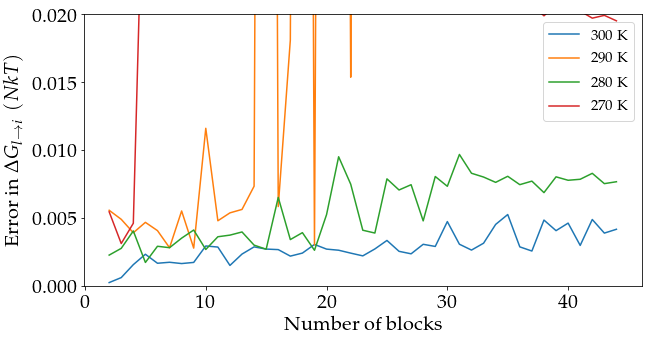

In [42]:
###################################################################
# Plot options
###################################################################
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (10,5)

maxNumBlocks=45
N=96
CVlimit=N/2.0

temperature=300
beta=1./(0.00831441001626*temperature)
obs=np.zeros(CV300.shape[0])
obs[CV300>CVlimit]=1
obsVector=np.zeros(maxNumBlocks)
obsStdDevVector=np.zeros(maxNumBlocks)
obsStdDevErrorVector=np.zeros(maxNumBlocks)
blockLength=np.zeros(maxNumBlocks)
for i in range(2,maxNumBlocks,1):
    batchNum=i
    averages=np.zeros(batchNum)
    weightsAvg=np.zeros(batchNum)
    averages,weightsAvg = observableAvgBatch(obs,Bias300,300,batchNum)
    obsVector[i]=np.average(averages,weights=weightsAvg)
    obsStdDevVector[i]=stdWithWeights(averages,weights=weightsAvg)/np.sqrt(batchNum)
    obsStdDevErrorVector[i]=obsStdDevVector[i]/np.sqrt(2*(batchNum-1))
    blockLength[i]=int(CV300.shape[0]/batchNum)
plt.plot(np.arange(2,maxNumBlocks,1),obsStdDevVector[2:]/(N*obsVector[2:]*(1-obsVector[2:])),label="300 K")

temperature=290
beta=1./(0.00831441001626*temperature)
obs=np.zeros(CV290.shape[0])
obs[CV290>CVlimit]=1
obsVector=np.zeros(maxNumBlocks)
obsStdDevVector=np.zeros(maxNumBlocks)
obsStdDevErrorVector=np.zeros(maxNumBlocks)
blockLength=np.zeros(maxNumBlocks)
for i in range(2,maxNumBlocks,1):
    batchNum=i
    averages=np.zeros(batchNum)
    weightsAvg=np.zeros(batchNum)
    averages,weightsAvg = observableAvgBatch(obs,Bias290,290,batchNum)
    obsVector[i]=np.average(averages,weights=weightsAvg)
    obsStdDevVector[i]=stdWithWeights(averages,weights=weightsAvg)/np.sqrt(batchNum)
    obsStdDevErrorVector[i]=obsStdDevVector[i]/np.sqrt(2*(batchNum-1))
    blockLength[i]=int(CV290.shape[0]/batchNum)
plt.plot(np.arange(2,maxNumBlocks,1),obsStdDevVector[2:]/(N*obsVector[2:]*(1-obsVector[2:])),label="290 K")

temperature=280
beta=1./(0.00831441001626*temperature)
obs=np.zeros(CV280.shape[0])
obs[CV280>CVlimit]=1
obsVector=np.zeros(maxNumBlocks)
obsStdDevVector=np.zeros(maxNumBlocks)
obsStdDevErrorVector=np.zeros(maxNumBlocks)
blockLength=np.zeros(maxNumBlocks)
for i in range(2,maxNumBlocks,1):
    batchNum=i
    averages=np.zeros(batchNum)
    weightsAvg=np.zeros(batchNum)
    averages,weightsAvg = observableAvgBatch(obs,Bias280,280,batchNum)
    obsVector[i]=np.average(averages,weights=weightsAvg)
    obsStdDevVector[i]=stdWithWeights(averages,weights=weightsAvg)/np.sqrt(batchNum)
    obsStdDevErrorVector[i]=obsStdDevVector[i]/np.sqrt(2*(batchNum-1))
    blockLength[i]=int(CV280.shape[0]/batchNum)
plt.plot(np.arange(2,maxNumBlocks,1),obsStdDevVector[2:]/(N*obsVector[2:]*(1-obsVector[2:])),label="280 K")

temperature=270
beta=1./(0.00831441001626*temperature)
obs=np.zeros(CV270.shape[0])
obs[CV270>CVlimit]=1
obsVector=np.zeros(maxNumBlocks)
obsStdDevVector=np.zeros(maxNumBlocks)
obsStdDevErrorVector=np.zeros(maxNumBlocks)
blockLength=np.zeros(maxNumBlocks)
for i in range(2,maxNumBlocks,1):
    batchNum=i
    averages=np.zeros(batchNum)
    weightsAvg=np.zeros(batchNum)
    averages,weightsAvg = observableAvgBatch(obs,Bias270,270,batchNum)
    obsVector[i]=np.average(averages,weights=weightsAvg)
    obsStdDevVector[i]=stdWithWeights(averages,weights=weightsAvg)/np.sqrt(batchNum)
    obsStdDevErrorVector[i]=obsStdDevVector[i]/np.sqrt(2*(batchNum-1))
    blockLength[i]=int(CV270.shape[0]/batchNum)
plt.plot(np.arange(2,maxNumBlocks,1),obsStdDevVector[2:]/(N*obsVector[2:]*(1-obsVector[2:])),label="270 K")

plt.ylim([0,0.02])

plt.xlabel("Number of blocks")
plt.ylabel(r"Error in $\Delta G_{l\rightarrow i} \:\:(NkT)$")
plt.legend(loc='upper right', fontsize=15)

plt.show()

### 288 molecules

In [43]:
N=288

In [44]:
COLVARtrim280=np.genfromtxt("288molecules/280K/Reweight/COLVARtrim")
COLVARtrim290=np.genfromtxt("288molecules/290K/Reweight/COLVARtrim")
COLVARtrim300=np.genfromtxt("288molecules/300K/Reweight/COLVARtrim")

In [45]:
CV280=np.copy(COLVARtrim280[:,3])
Bias280=np.copy(COLVARtrim280[:,4])+np.copy(COLVARtrim280[:,9])
CV290=np.copy(COLVARtrim290[:,3])
Bias290=np.copy(COLVARtrim290[:,4])+np.copy(COLVARtrim290[:,9])
CV300=np.copy(COLVARtrim300[:,3])
Bias300=np.copy(COLVARtrim300[:,4])+np.copy(COLVARtrim300[:,9])

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


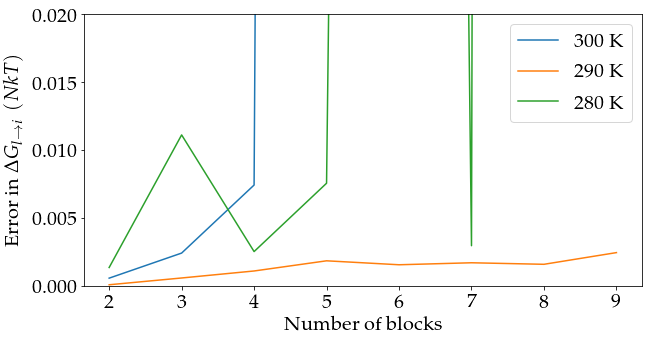

In [46]:
maxNumBlocks=10
N=288
CVlimit=N/2.0

temperature=300
beta=1./(0.00831441001626*temperature)
obs=np.zeros(CV300.shape[0])
obs[CV300>CVlimit]=1
obsVector=np.zeros(maxNumBlocks)
obsStdDevVector=np.zeros(maxNumBlocks)
obsStdDevErrorVector=np.zeros(maxNumBlocks)
blockLength=np.zeros(maxNumBlocks)
for i in range(2,maxNumBlocks,1):
    batchNum=i
    averages=np.zeros(batchNum)
    weightsAvg=np.zeros(batchNum)
    averages,weightsAvg = observableAvgBatch(obs,Bias300,300,batchNum)
    obsVector[i]=np.average(averages,weights=weightsAvg)
    obsStdDevVector[i]=stdWithWeights(averages,weights=weightsAvg)/np.sqrt(batchNum)
    obsStdDevErrorVector[i]=obsStdDevVector[i]/np.sqrt(2*(batchNum-1))
    blockLength[i]=int(CV300.shape[0]/batchNum)
plt.plot(np.arange(2,maxNumBlocks,1),obsStdDevVector[2:]/(N*obsVector[2:]*(1-obsVector[2:])),label="300 K")

temperature=290
beta=1./(0.00831441001626*temperature)
obs=np.zeros(CV290.shape[0])
obs[CV290>CVlimit]=1
obsVector=np.zeros(maxNumBlocks)
obsStdDevVector=np.zeros(maxNumBlocks)
obsStdDevErrorVector=np.zeros(maxNumBlocks)
blockLength=np.zeros(maxNumBlocks)
for i in range(2,maxNumBlocks,1):
    batchNum=i
    averages=np.zeros(batchNum)
    weightsAvg=np.zeros(batchNum)
    averages,weightsAvg = observableAvgBatch(obs,Bias290,290,batchNum)
    obsVector[i]=np.average(averages,weights=weightsAvg)
    obsStdDevVector[i]=stdWithWeights(averages,weights=weightsAvg)/np.sqrt(batchNum)
    obsStdDevErrorVector[i]=obsStdDevVector[i]/np.sqrt(2*(batchNum-1))
    blockLength[i]=int(CV290.shape[0]/batchNum)
plt.plot(np.arange(2,maxNumBlocks,1),obsStdDevVector[2:]/(N*obsVector[2:]*(1-obsVector[2:])),label="290 K")

temperature=280
beta=1./(0.00831441001626*temperature)
obs=np.zeros(CV280.shape[0])
obs[CV280>CVlimit]=1
obsVector=np.zeros(maxNumBlocks)
obsStdDevVector=np.zeros(maxNumBlocks)
obsStdDevErrorVector=np.zeros(maxNumBlocks)
blockLength=np.zeros(maxNumBlocks)
for i in range(2,maxNumBlocks,1):
    batchNum=i
    averages=np.zeros(batchNum)
    weightsAvg=np.zeros(batchNum)
    averages,weightsAvg = observableAvgBatch(obs,Bias280,280,batchNum)
    obsVector[i]=np.average(averages,weights=weightsAvg)
    obsStdDevVector[i]=stdWithWeights(averages,weights=weightsAvg)/np.sqrt(batchNum)
    obsStdDevErrorVector[i]=obsStdDevVector[i]/np.sqrt(2*(batchNum-1))
    blockLength[i]=int(CV280.shape[0]/batchNum)
plt.plot(np.arange(2,maxNumBlocks,1),obsStdDevVector[2:]/(N*obsVector[2:]*(1-obsVector[2:])),label="280 K")

plt.ylim([0,0.02])
plt.xlabel("Number of blocks")
plt.ylabel(r"Error in $\Delta G_{l\rightarrow i} \:\:(NkT)$")
plt.legend(loc='upper right', fontsize=20)
plt.show()

### 16 molecules

In [47]:
N=16

In [48]:
COLVARtrim270=np.genfromtxt("16molecules/270K/Reweight/COLVARtrim")
COLVARtrim280=np.genfromtxt("16molecules/280K/Reweight/COLVARtrim")
COLVARtrim290=np.genfromtxt("16molecules/290K/Reweight/COLVARtrim")
COLVARtrim300=np.genfromtxt("16molecules/300K/Reweight/COLVARtrim")

In [49]:
CV270=np.copy(COLVARtrim270[:,3])
Bias270=np.copy(COLVARtrim270[:,4])+np.copy(COLVARtrim270[:,8])
Q6270=np.copy(COLVARtrim270[:,6])

CV280=np.copy(COLVARtrim280[:,3])
Bias280=np.copy(COLVARtrim280[:,4])+np.copy(COLVARtrim280[:,8])
Q6280=np.copy(COLVARtrim280[:,6])

CV290=np.copy(COLVARtrim290[:,3])
Bias290=np.copy(COLVARtrim290[:,4])+np.copy(COLVARtrim290[:,8])
Q6290=np.copy(COLVARtrim290[:,6])

CV300=np.copy(COLVARtrim300[:,3])
Bias300=np.copy(COLVARtrim300[:,4])+np.copy(COLVARtrim300[:,8])
Q6300=np.copy(COLVARtrim300[:,6])

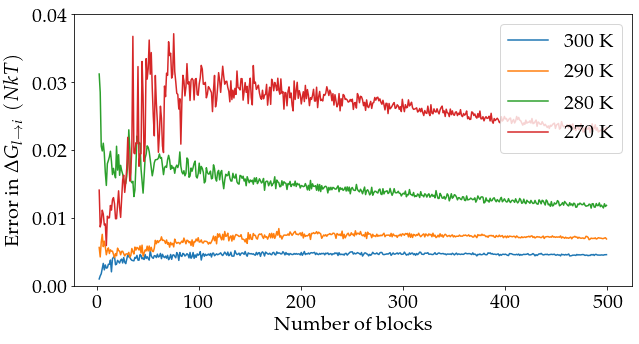

In [50]:
maxNumBlocks=500
N=16
CVlimit=N/2.0

temperature=300
beta=1./(0.00831441001626*temperature)
obs=np.zeros(CV300.shape[0])
obs[CV300>CVlimit]=1
obsVector=np.zeros(maxNumBlocks)
obsStdDevVector=np.zeros(maxNumBlocks)
obsStdDevErrorVector=np.zeros(maxNumBlocks)
blockLength=np.zeros(maxNumBlocks)
for i in range(2,maxNumBlocks,1):
    batchNum=i
    averages=np.zeros(batchNum)
    weightsAvg=np.zeros(batchNum)
    averages,weightsAvg = observableAvgBatch(obs,Bias300,300,batchNum)
    obsVector[i]=np.average(averages,weights=weightsAvg)
    obsStdDevVector[i]=stdWithWeights(averages,weights=weightsAvg)/np.sqrt(batchNum)
    obsStdDevErrorVector[i]=obsStdDevVector[i]/np.sqrt(2*(batchNum-1))
    blockLength[i]=int(CV300.shape[0]/batchNum)
plt.plot(np.arange(2,maxNumBlocks,1),obsStdDevVector[2:]/(N*obsVector[2:]*(1-obsVector[2:])),label="300 K")

#maxNumBlocks=15
temperature=290
beta=1./(0.00831441001626*temperature)
obs=np.zeros(CV290.shape[0])
obs[CV290>CVlimit]=1
obsVector=np.zeros(maxNumBlocks)
obsStdDevVector=np.zeros(maxNumBlocks)
obsStdDevErrorVector=np.zeros(maxNumBlocks)
blockLength=np.zeros(maxNumBlocks)
for i in range(2,maxNumBlocks,1):
    batchNum=i
    averages=np.zeros(batchNum)
    weightsAvg=np.zeros(batchNum)
    averages,weightsAvg = observableAvgBatch(obs,Bias290,290,batchNum)
    obsVector[i]=np.average(averages,weights=weightsAvg)
    obsStdDevVector[i]=stdWithWeights(averages,weights=weightsAvg)/np.sqrt(batchNum)
    obsStdDevErrorVector[i]=obsStdDevVector[i]/np.sqrt(2*(batchNum-1))
    blockLength[i]=int(CV290.shape[0]/batchNum)
plt.plot(np.arange(2,maxNumBlocks,1),obsStdDevVector[2:]/(N*obsVector[2:]*(1-obsVector[2:])),label="290 K")

#maxNumBlocks=15
temperature=280
beta=1./(0.00831441001626*temperature)
obs=np.zeros(CV280.shape[0])
obs[CV280>CVlimit]=1
obsVector=np.zeros(maxNumBlocks)
obsStdDevVector=np.zeros(maxNumBlocks)
obsStdDevErrorVector=np.zeros(maxNumBlocks)
blockLength=np.zeros(maxNumBlocks)
for i in range(2,maxNumBlocks,1):
    batchNum=i
    averages=np.zeros(batchNum)
    weightsAvg=np.zeros(batchNum)
    averages,weightsAvg = observableAvgBatch(obs,Bias280,280,batchNum)
    obsVector[i]=np.average(averages,weights=weightsAvg)
    obsStdDevVector[i]=stdWithWeights(averages,weights=weightsAvg)/np.sqrt(batchNum)
    obsStdDevErrorVector[i]=obsStdDevVector[i]/np.sqrt(2*(batchNum-1))
    blockLength[i]=int(CV280.shape[0]/batchNum)
plt.plot(np.arange(2,maxNumBlocks,1),obsStdDevVector[2:]/(N*obsVector[2:]*(1-obsVector[2:])),label="280 K")

#maxNumBlocks=15
temperature=270
beta=1./(0.00831441001626*temperature)
obs=np.zeros(CV270.shape[0])
obs[CV270>CVlimit]=1
obsVector=np.zeros(maxNumBlocks)
obsStdDevVector=np.zeros(maxNumBlocks)
obsStdDevErrorVector=np.zeros(maxNumBlocks)
blockLength=np.zeros(maxNumBlocks)
for i in range(2,maxNumBlocks,1):
    batchNum=i
    averages=np.zeros(batchNum)
    weightsAvg=np.zeros(batchNum)
    averages,weightsAvg = observableAvgBatch(obs,Bias270,270,batchNum)
    obsVector[i]=np.average(averages,weights=weightsAvg)
    obsStdDevVector[i]=stdWithWeights(averages,weights=weightsAvg)/np.sqrt(batchNum)
    obsStdDevErrorVector[i]=obsStdDevVector[i]/np.sqrt(2*(batchNum-1))
    blockLength[i]=int(CV280.shape[0]/batchNum)
plt.plot(np.arange(2,maxNumBlocks,1),obsStdDevVector[2:]/(N*obsVector[2:]*(1-obsVector[2:])),label="270 K")

plt.ylim([0,0.04])
plt.xlabel("Number of blocks")
plt.ylabel(r"Error in $\Delta G_{l\rightarrow i} \:\:(NkT)$")
plt.legend(loc='upper right', fontsize=20)
plt.show()

# Sampled distributions

In [51]:
N=96

In [52]:
COLVARtrim270=np.genfromtxt("96molecules/270K/Reweight/COLVARtrim")
COLVARtrim280=np.genfromtxt("96molecules/280K/Reweight/COLVARtrim")
COLVARtrim290=np.genfromtxt("96molecules/290K/Reweight/COLVARtrim")
COLVARtrim300=np.genfromtxt("96molecules/300K/Reweight/COLVARtrim")

In [53]:
CV270=np.copy(COLVARtrim270[:,3])
Bias270=np.copy(COLVARtrim270[:,4])+np.copy(COLVARtrim270[:,9])
CV280=np.copy(COLVARtrim280[:,3])
Bias280=np.copy(COLVARtrim280[:,4])+np.copy(COLVARtrim280[:,9])
CV290=np.copy(COLVARtrim290[:,3])
Bias290=np.copy(COLVARtrim290[:,4])+np.copy(COLVARtrim290[:,9])
CV300=np.copy(COLVARtrim300[:,3])
Bias300=np.copy(COLVARtrim300[:,4])+np.copy(COLVARtrim300[:,9])

In [54]:
hist270, bin_edges270 = np.histogram(CV270, bins=100, density=True)
hist280, bin_edges280 = np.histogram(CV280, bins=100, density=True)
hist290, bin_edges290 = np.histogram(CV290, bins=100, density=True)
hist300, bin_edges300 = np.histogram(CV300, bins=100, density=True)

In [55]:
efes270 = -np.log(hist270)
efes270 -= np.amin(efes270)
efes280 = -np.log(hist280)
efes280 -= np.amin(efes280)
efes290 = -np.log(hist290)
efes290 -= np.amin(efes290)
efes300 = -np.log(hist300)
efes300 -= np.amin(efes300)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


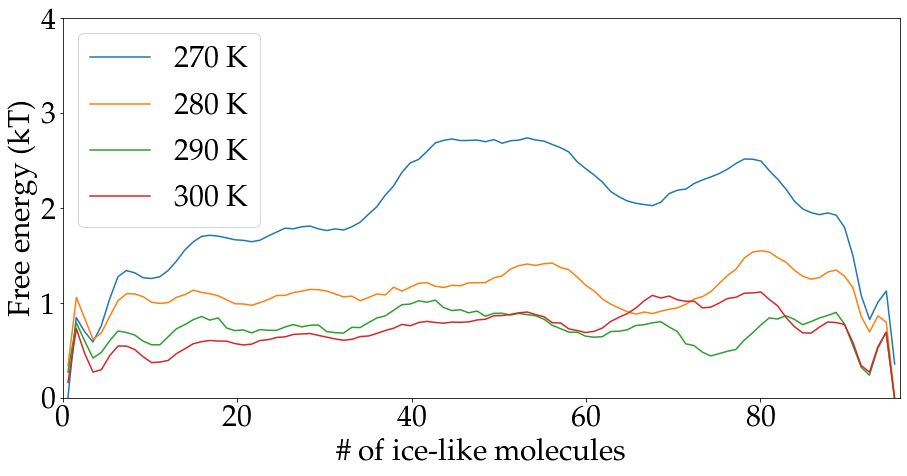

In [56]:
###################################################################
# Plot options
###################################################################
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 30}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (15,7)


plt.plot((bin_edges270[:-1]+bin_edges270[1:])/2.0,efes270,label="270 K")

plt.plot((bin_edges280[:-1]+bin_edges280[1:])/2.0,efes280,label="280 K")

plt.plot((bin_edges290[:-1]+bin_edges290[1:])/2.0,efes290,label="290 K")

plt.plot((bin_edges300[:-1]+bin_edges300[1:])/2.0,efes300,label="300 K")

plt.legend()

plt.xlabel(r"\# of ice-like molecules")
plt.ylabel(r"Free energy (kT)")
plt.ylim([0,4])
plt.xlim([0,96])

plt.show()

# Distributions

In [57]:
distLiquid270K288mol=np.genfromtxt("../Equilibration/288molecules/Distributions/histoLiquid")
distSolid270K288mol=np.genfromtxt("../Equilibration/288molecules/Distributions/histoSolid")

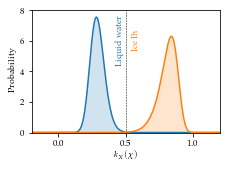

In [58]:
###################################################################
# Plot options
###################################################################
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.37,2.25)

plt.plot([0.5,0.5],[0,8],'k--',linewidth=0.5)

plt.plot(distLiquid270K288mol[:,0],distLiquid270K288mol[:,1])
plt.fill_between(distLiquid270K288mol[:,0],0,distLiquid270K288mol[:,1],alpha=0.2)

plt.plot(distSolid270K288mol[:,0],distSolid270K288mol[:,1])
plt.fill_between(distSolid270K288mol[:,0],0,distSolid270K288mol[:,1],alpha=0.2)

plt.text(0.45,6,"Liquid water",rotation=90,color=colors[0], ha='center', va='center')
plt.text(0.57,6,"Ice Ih",rotation=90,color=colors[1], ha='center', va='center')

plt.xlim([-0.2,1.2])
plt.ylim([0,8])
plt.xticks([0,0.5,1])
plt.xlabel(r"$k_X(\chi)$")
plt.ylabel(r"Probability")

#plt.savefig("Figure2a.png", dpi=300, bbox_inches='tight')

plt.show()

## Proton configuration

In [59]:
from matplotlib.colors import LinearSegmentedColormap
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)
MarkerSize=20
palette=tableau20

def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    rgb=tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))
    return tuple([x/255. for x in rgb])

cm_tableau20_colors = [LinearSegmentedColormap.from_list("T1", [hex_to_rgb("#ffffff"), palette[0], palette[0] ], N=1000),
                  LinearSegmentedColormap.from_list("T2", [hex_to_rgb("#ffffff"), palette[2], palette[2] ], N=1000)
                ]

for i in range(2):
    cm_tableau20_colors[i]._init()
    N = cm_tableau20_colors[i].N
    alphas = np.zeros(N)
    alphas[0:int(N/2)] = np.abs(np.linspace(0.0, 1.0, int(N/2)))
    alphas[int(N/2):N] = np.ones(int(N/2))
    cm_tableau20_colors[i]._lut[:-3,-1] = alphas

In [60]:
# Mean of dipole in ice XI
muice11=3*0.209802853 # I divided by number of atoms and not molecules
muxice11=5.32779504e-04
muyice11=3.59100624e-04
muzice11=9.99896969e-01

In [61]:
data96=np.genfromtxt("96molecules/300K/Analysis/COLVARdipole")

In [62]:
hexadia96=np.copy(data96[:,14])
bias96=np.copy(data96[:,4])
mux96=np.copy(data96[:,16])
muy96=np.copy(data96[:,17])
muz96=np.copy(data96[:,18])
munorm96=3*np.copy(data96[:,19]) # I divided by number of atoms and not molecules

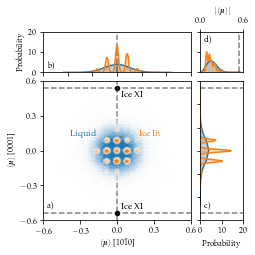

In [64]:
###################################################################
# Plot options
###################################################################
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 8}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
plt.rcParams['figure.figsize'] = (3.37,3.37)
    

ax1 = plt.subplot2grid((4, 4), (0, 0),colspan=3)
onedipole=1.171709655233643
ax1.plot(muice11*muxice11*np.ones(2)/onedipole,[0,50],'k--',alpha=0.5)
hist, bin_edges = np.histogram(mux96[hexadia96<2]*munorm96[hexadia96<2]/onedipole, bins=100, density=True)
x = (bin_edges[:-1]+bin_edges[1:])/2.0
ax1.plot(x,hist)
ax1.fill_between(x,0,hist,alpha=0.3)
hist, bin_edges = np.histogram(mux96[hexadia96>60]*munorm96[hexadia96>60]/onedipole, bins=200, density=True)
x = (bin_edges[:-1]+bin_edges[1:])/2.0
ax1.plot(x,hist)
ax1.fill_between(x,0,hist,alpha=0.3)
ax1.set_ylabel("Probability")
ax1.set_xlim([-0.6,0.6])
ax1.set_ylim([0,20])
ax1.set_xticklabels([])
ax1.set_yticks([0,10,20])
ax1.text(-0.54,3,"b)",ha='center',va='center')


ax2 = plt.subplot2grid((4, 4), (1, 3),rowspan=3)
onedipole=1.171709655233643
ax2.plot([0,20],muice11*muzice11*np.ones(2)/onedipole,'k--',alpha=0.5)
ax2.plot([0,20],-muice11*muzice11*np.ones(2)/onedipole,'k--',alpha=0.5)
hist, bin_edges = np.histogram(muz96[hexadia96<2]*munorm96[hexadia96<2]/onedipole, bins=100, density=True)
x = (bin_edges[:-1]+bin_edges[1:])/2.0
ax2.plot(hist,x)
ax2.fill_between(hist,0,x,alpha=0.3)
hist, bin_edges = np.histogram(muz96[hexadia96>60]*munorm96[hexadia96>60]/onedipole, bins=200, density=True)
x = (bin_edges[:-1]+bin_edges[1:])/2.0
ax2.plot(hist,x)
ax2.fill_between(hist,0,x,alpha=0.3)
ax2.set_xlabel("Probability")
ax2.set_ylim([-0.6,0.6])
ax2.set_xlim([0,20])
ax2.set_yticklabels([])
ax2.set_xticks([0,10,20])
ax2.text(3,-0.48,"c)",ha='center',va='center')

ax3 = plt.subplot2grid((4, 4), (1, 0),rowspan=3,colspan=3)
ax3.hist2d(munorm96[hexadia96<2]*mux96[hexadia96<2]/onedipole,munorm96[hexadia96<2]*muz96[hexadia96<2]/onedipole, bins=200, density=True, cmap=cm_tableau20_colors[0],zorder=3)
ax3.hist2d(munorm96[hexadia96>60]*mux96[hexadia96>60]/onedipole,munorm96[hexadia96>60]*muz96[hexadia96>60]/onedipole, bins=200, density=True,cmap=cm_tableau20_colors[1],zorder=3)
ax3.scatter(muice11*muxice11/onedipole,muice11*muzice11/onedipole,color='black',s=20)
ax3.scatter(muice11*muxice11/onedipole,-muice11*muzice11/onedipole,color='black',s=20)
ax3.plot(muice11*muxice11*np.ones(2)/onedipole,[-0.6,0.6],'k--',alpha=0.5,zorder=1)
ax3.plot([-0.6,0.6],muice11*muzice11*np.ones(2)/onedipole,'k--',alpha=0.5,zorder=1)
ax3.plot([-0.6,0.6],-muice11*muzice11*np.ones(2)/onedipole,'k--',alpha=0.5,zorder=1)
ax3.set_xlim([-0.6,0.6])
ax3.set_ylim([-0.6,0.6])
ax3.set_xlabel(r"$\langle \boldsymbol{\mu} \rangle$ [10$\bar{1}$0]")
ax3.set_ylabel(r"$\langle \boldsymbol{\mu} \rangle$ [0001]")
ax3.text(-0.27,0.15,"Liquid",color=palette[0],ha='center',va='center',fontsize=9)
ax3.text( 0.27,0.15,"Ice Ih",color=palette[2],ha='center',va='center',fontsize=9)
ax3.text(0.12,0.48,"Ice XI",ha='center',va='center',fontsize=9)
ax3.text(0.12,-0.48,"Ice XI",ha='center',va='center',fontsize=9)
ax3.set_xticks(np.arange(-0.6,0.9,0.3))
ax3.set_yticks(np.arange(-0.6,0.9,0.3))
ax3.text(-0.54,-0.48,"a)",ha='center',va='center')

ax4 = plt.subplot2grid((4, 4), (0, 3))
onedipole=1.171709655233643
hist, bin_edges = np.histogram(munorm96[hexadia96<2]/onedipole, bins=100, density=True)
x = (bin_edges[:-1]+bin_edges[1:])/2.0
ax4.plot(x,hist)
ax4.fill_between(x,0,hist,alpha=0.3)
hist, bin_edges = np.histogram(munorm96[hexadia96>60]/onedipole, bins=200, density=True)
x = (bin_edges[:-1]+bin_edges[1:])/2.0
ax4.plot(x,hist)
ax4.fill_between(x,0,hist,alpha=0.3)
ax4.plot(muice11*np.ones(2)/onedipole,[0,50],'k--',alpha=0.5)
ax4.xaxis.set_label_position("top")
ax4.xaxis.tick_top()
ax4.set_xlabel(r"$ | \langle \boldsymbol{\mu} \rangle | $") #,labelpad=-3)
ax4.set_yticklabels([])
ax4.set_xlim([0,0.6])
ax4.set_ylim([0,20])
ax4.set_yticks([0,10,20])
ax4.set_xticks([0,0.6])
ax4.text(0.11,16,"d)",ha='center',va='center')

plt.tight_layout(pad=0.1)

#plt.savefig("Figure5.png", dpi=300, bbox_inches='tight')

plt.show()